In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [185]:
data = pd.read_csv('Social_Network_Ads.csv', delimiter = ',')

In [186]:
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [187]:
#preprocessing
#create a label encoder to encode the Gender variable

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])



In [53]:
data['Gender'].value_counts()



0    204
1    196
Name: Gender, dtype: int64

EDA of the given data

In [122]:
#eda of the data

most_occured_salary = data['EstimatedSalary'].value_counts().idxmax()
salaries_freq = data['EstimatedSalary'].value_counts().values
highest_estimated_salary = data['EstimatedSalary'].max()

In [154]:
#print the higest occuring salary in the data and highest estimated salary

print('The most occured Estimated salary is',most_occured_salary)
print('The highest Estimated salary is', highest_estimated_salary )

The most occured Estimated salary is 72000
The highest Estimated salary is 150000


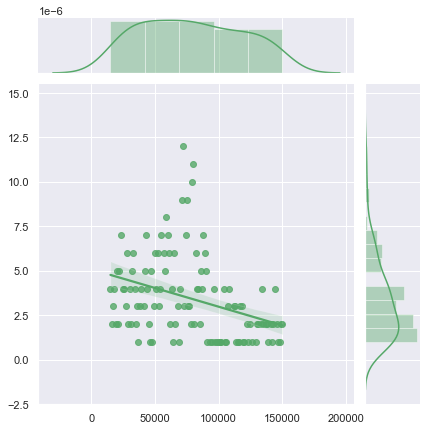

In [112]:
#Plot the salary values against it's frequency
sns.jointplot(salaries, salaries_freq, kind = 'reg', color = 'g', data = data)

From the visualization above, the highest occuring estimated salary is 72000 as it occurs 12 times

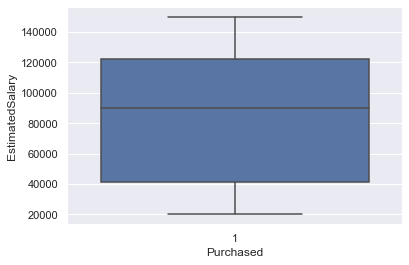

In [230]:
#among those that purchased, the least estimated salary is less than 25,000........

purchased_data = data[data['Purchased'] == 1]

y = purchased_data.EstimatedSalary
x = purchased_data.Purchased
sns.boxplot( y = y, x = x, data = purchased_data )

From the analysis above, the least salary that purchased is 20,000.

Below is the generated Salary to prove the above visualization

In [183]:
least_purchasing_salary = purchased_data.EstimatedSalary.values.min()

print('The least salary among those that purchased is', least_purchasing_salary)

The least salary among those that purchased is 20000


Pairwise Visualization

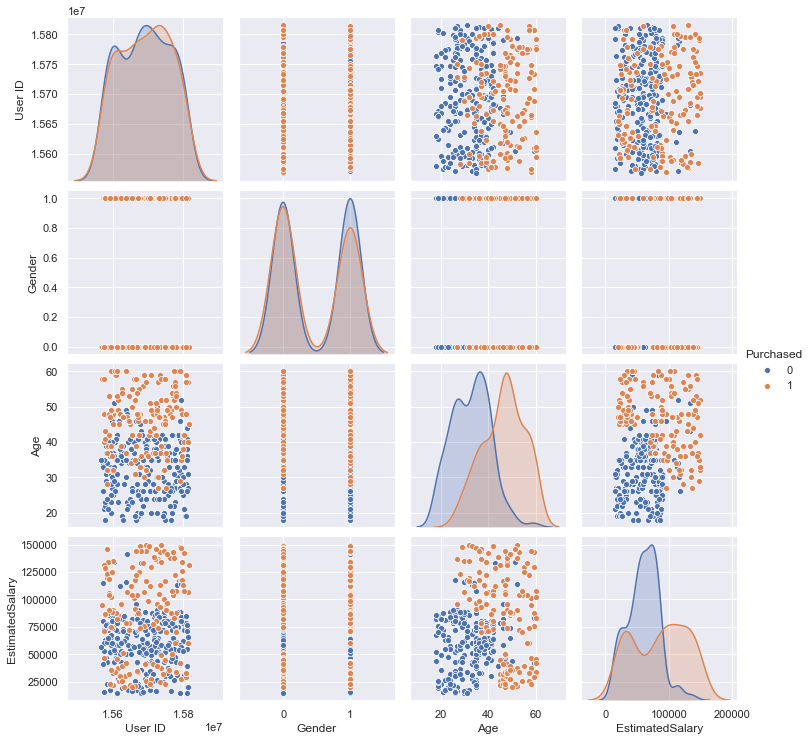

In [114]:
sns.pairplot(data, hue = 'Purchased')

From the visualisation of Estimated Salary against Age, the least salary earners that didn't purchase are slightly more than 25 years, with an estimated salary that is less than 25,000. They're both male and female.

The first five data points in the data Frame below proves this as the least Estimated salary is 15,000

In [193]:
data['EstimatedSalary'].value_counts().get(15000)
data.sort_values(by = 'EstimatedSalary', ascending=True, inplace=False).head()

,User ID,Gender,Age,EstimatedSalary,Purchased
92,15809823,1,26,15000,0
43,15792008,1,30,15000,0
155,15610140,0,31,15000,0
150,15679651,0,26,15000,0
32,15573452,0,21,16000,0


In [194]:
#mean sof the data of those that purchased
mean_values = group_by_purchase.mean()
mean_values

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


A data frame representing the number of those that purchased from those that didn't, with a visualization of users in that category

In [243]:
count = group_by_purchase.count()
user_id = count['User ID'].values
purchased_or_not = count['User ID'].index

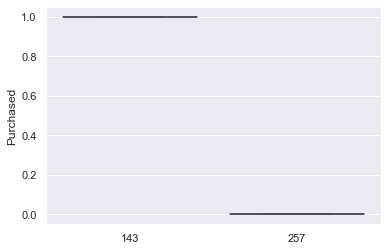

In [244]:
#visualisation of the number of users in each category
sns.boxplot(user_id, purchased_or_not)





In [107]:
#percentage of users that bought the ads

(data['Purchased'].value_counts()[1]/len(data['Purchased'])) * 100

35.75

Engineered Features

In [245]:
data['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<56 else 'BabyBoomers' if 55<age<74 else None \
 for age in list(data['Age'].values)]

data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium','High'])

Making the engineered features fit for modelling, i.e converting it to numerical data

In [248]:
#making Age Category and Income Category suitable for training

Encoder = LabelEncoder()

data['Age Category'] = Encoder.fit_transform(data['Age Category'])
data['Income Category'] = Encoder.fit_transform(data['Income Category'])

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,3,1
1,15810944,1,35,20000,0,2,1
2,15668575,0,26,43000,0,2,1
3,15603246,0,27,57000,0,2,2
4,15804002,1,19,76000,0,3,2


In [ ]:
sns.countplot()

Assignment 1

Use engineered features i.e new columns in training your model. Confirm if it improves our models significantly or not ?

In [252]:
from sklearn.model_selection import train_test_split


x = data[['Gender','Age','EstimatedSalary','Age Category','Income Category']]
y = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.30, random_state = 42)


Algorithm/ Model 1 : Naive Bayes

In [253]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)


In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print(accuracy)
print(precision)
print(recall)

0.95
0.9767441860465116
0.8936170212765957


Using Naive Bayes Classifier on the data sets containing the added features, the model was improved significantly

In [262]:
#calculate ROC curve
from sklearn.metrics import roc_curve, auc, confusion_matrix

fpr, tpr, thresholds = roc_curve (y_test, pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.9399591955698046


In [265]:
#Plot confusion matrix

# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= confusion_matrix(y_test, pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

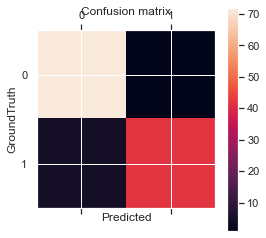

[[72  1]
 [ 5 42]]


In [266]:
conftable(y_test,pred,"conf")

In [270]:
# Ground Truth
pd.Series(y_test).value_counts()

0    73
1    47
Name: Purchased, dtype: int64

In [ ]:
Algorithm/ Model 2 : Logistic Regression

In [271]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [273]:
# Predicting the Test set results
pred = classifier.predict(x_test)

Accuracy:  0.875
Precision:  0.9210526315789473
Recall:  0.7446808510638298
ROC AUC 0.8517924803264355


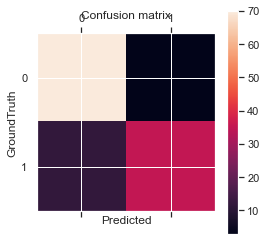

[[70  3]
 [12 35]]


In [275]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Precision: ", metrics.precision_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
fpr, tpr, thresholds = roc_curve (y_test, pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,pred,"conf")

Using Logistic Regression Classifier on data sets containing the added features, the model was improved significantly

Algorithm/ Model 3 : Random Forest

In [276]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [278]:
# Predicting the Test set results
pred = classifier.predict(x_test)


array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

Accuracy:  0.9083333333333333
Precision:  0.86
Recall:  0.9148936170212766
ROC AUC 0.9095016030311862


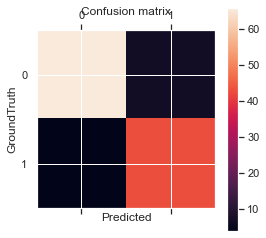

[[66  7]
 [ 4 43]]


In [279]:
print("Accuracy: ", metrics.accuracy_score(y_test, pred))
print("Precision: ", metrics.precision_score(y_test, pred))
print("Recall: ", metrics.recall_score(y_test, pred))
fpr, tpr, thresholds = roc_curve (y_test, pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,pred,"conf")

Using Random Forest Classifier on data sets containing the added features, the model was improved significantly

Assignment two

Extract other features and re-train the classification models to note their accuracy metrics

Extracting the Gender feature and the income category

In [288]:
data_after_feature_extracton = data.drop(columns = data[['Gender','Income Category']], inplace = False)

data_after_feature_extracton

,User ID,Age,EstimatedSalary,Purchased,Age Category
0,15624510,19,19000,0,3
1,15810944,35,20000,0,2
2,15668575,26,43000,0,2
3,15603246,27,57000,0,2
4,15804002,19,76000,0,3
...,...,...,...,...,...
395,15691863,46,41000,1,1
396,15706071,51,23000,1,1
397,15654296,50,20000,1,1
398,15755018,36,33000,0,2


In [289]:
from sklearn.model_selection import train_test_split


x = data[['Age','EstimatedSalary','Age Category']]
y = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.30, random_state = 42)


Algorithm/ Model 1 : Naive Bayes

In [290]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)


In [297]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9333333333333333


After the feature extraction, the naive bayes classification model accuracy reduced

Algorithm/ Model 2 : Logistic Regression

In [295]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [299]:
from sklearn.metrics import accuracy_score

# Predicting the Test set results
pred = classifier.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  0.6083333333333333


Deploying the Logistic Regression Classification algorithm after the feature extraction yields a prediction with reduced accuracy

Algorithm/ Model 3 : Random Forest

In [300]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [301]:
# Predicting the Test set results
pred = classifier.predict(x_test)

In [302]:
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  0.875


Deploying the Random Forest Classification algorithm after the feature extraction yields a prediction with reduced accuracy